In [2]:
import io as fio

fname = '/Users/astyler/projects/ChargeCarData/gpx/illah/20100227.gpx'

ft = fio.open(fname)

ft.close()

In [3]:
import xml.etree.ElementTree as ET 
tree = ET.parse(fname) 
root = tree.getroot()

In [4]:
print root.keys

<bound method Element.keys of <Element '{http://www.topografix.com/GPX/1/1}gpx' at 0x1047d9890>>


In [5]:
root.attrib

{'creator': '',
 'version': '1.1',
 '{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd'}

In [6]:
def get_element_by_tag(element, tag):
    if element.tag.endswith(tag):
        yield element
    for child in element:
        for g in get_element_by_tag(child, tag):
            yield g

In [7]:
def stripnamespace(xmltree):
    for node in xmltree.getiterator():
        if '}' in node.tag:
            node.tag = node.tag.split('}', 1)[1]

In [8]:
stripnamespace(root)
root.getchildren()

[<Element 'trk' at 0x1047d9f50>,
 <Element 'trk' at 0x10489e190>,
 <Element 'trk' at 0x10489ea50>,
 <Element 'trk' at 0x1049db950>,
 <Element 'trk' at 0x1049e4e50>]

In [9]:
root.getchildren()[1].getchildren()[1].getchildren()[0].getchildren()[1].text


'2010-02-27T22:36:44Z'

In [10]:
vals = list()
for node in root.iter('trkpt'):
    vals.append(dict(node.items()+[('ele',node.getchildren()[0].text),('time',node.getchildren()[1].text)]))
    
     

In [11]:
lats = [val['lat'] for val in vals]
lons = [val['lon'] for val in vals]

In [13]:
import bokeh.plotting as bp
bp.output_notebook()
p = bp.figure(title="test trip", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(lons, lats, legend="pos", line_width=2)

# show the results
bp.show(p)


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


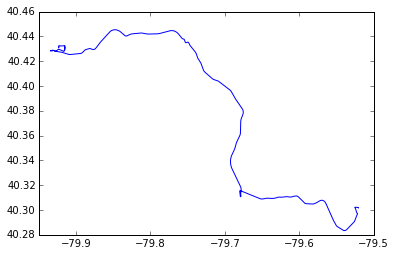

In [32]:
%pylab inline
pylab.plot(lons,lats)

In [18]:
import pandas
fname2 = '/Users/astyler/projects/ChargeCarData/csv/illah20100227_1.csv'
df = pandas.read_csv(fname2)
df.dtypes
#convert_numeric=True)


Latitude           float64
Longitude          float64
Elevation          float64
Bearing            float64
PlanarDistance     float64
Speed              float64
Acceleration       float64
Power              float64
TotalEnergyUsed    float64
PeriodMS             int64
Time                 int64
dtype: object

In [19]:
df

,Latitude,Longitude,Elevation,Bearing,PlanarDistance,Speed,Acceleration,Power,TotalEnergyUsed,PeriodMS,Time
0,40.429277,-79.915235,414.87,137.49,7.47,7.474,0.000,5044.7621,0.0000,1000,1267328212000
1,40.429232,-79.915169,415.15,137.49,7.47,7.474,0.000,5044.7826,1.4013,1000,1267328213000
2,40.429187,-79.915104,415.44,137.50,5.49,5.508,-1.965,-7649.4367,2.8027,1000,1267328214000
3,40.429153,-79.915057,414.96,137.50,3.17,3.187,-2.322,-1559.9135,0.6778,1000,1267328215000
4,40.429136,-79.915027,415.33,137.50,3.17,3.187,0.000,5118.6085,0.2445,1000,1267328216000
5,40.429119,-79.914997,415.70,180.00,0.08,0.382,-2.804,-308.7879,1.6663,1000,1267328217000
6,40.429119,-79.914996,416.07,137.50,0.68,0.978,0.596,-3115.3693,1.5806,1000,1267328218000
7,40.429116,-79.914989,415.37,317.49,0.52,0.703,-0.275,5667.9888,0.7152,1000,1267328219000
8,40.429117,-79.914983,415.84,137.50,1.16,1.228,0.526,-1491.0638,2.2896,1000,1267328220000
9,40.429112,-79.914971,415.43,137.50,2.50,2.513,1.284,1793.1045,1.8754,1000,1267328221000


<IPython.core.display.Javascript object>


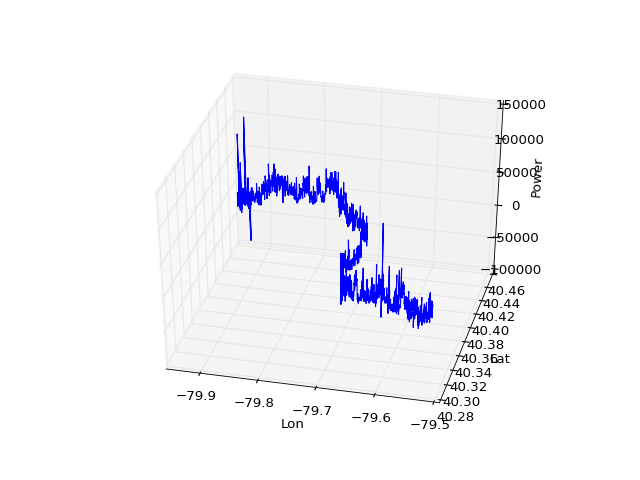

In [25]:
#%pylab inline
#df.plot(x='Longitude',y='Latitude',c='Power')
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')
threedee.plot(df.Longitude, df.Latitude, df.Power)
threedee.set_xlabel('Lon')
threedee.set_ylabel('Lat')
threedee.set_zlabel('Power')
plt.show()


In [20]:
p2 = bp.figure()

p2.line(df.Longitude, df.Latitude, legend="y=x")

In [21]:
bp.show(p2)